# Notebook 12: HR Tracing Stars Around Different Annuli

This notebook will explore different annuli and trace stars using the progenitor particles to see how the stars are migrating near present day redshift. We will be exploring around 10, 15, 25 kpc (since we did 20 kpc in Notebook 10). 


## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter 

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)

## sphere filter and stars
f_sphere = pynbody.filt.Sphere(radius_d, center_d)
h329_s_sphere = h329.s[f_sphere]

pynbody.analysis.angmom.faceon(h329_s_sphere)

## disk filter and stars
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)
h329_s_disk = h329_s_sphere[f_disk]


In [5]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile

## Background

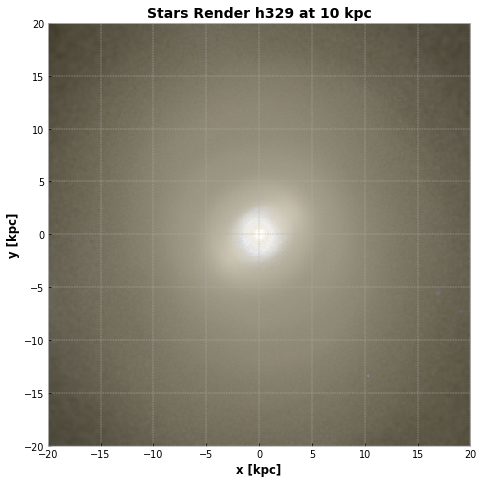

In [7]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 10 kpc', fontweight='bold');

## Radius Versus Age/FeH Profiles

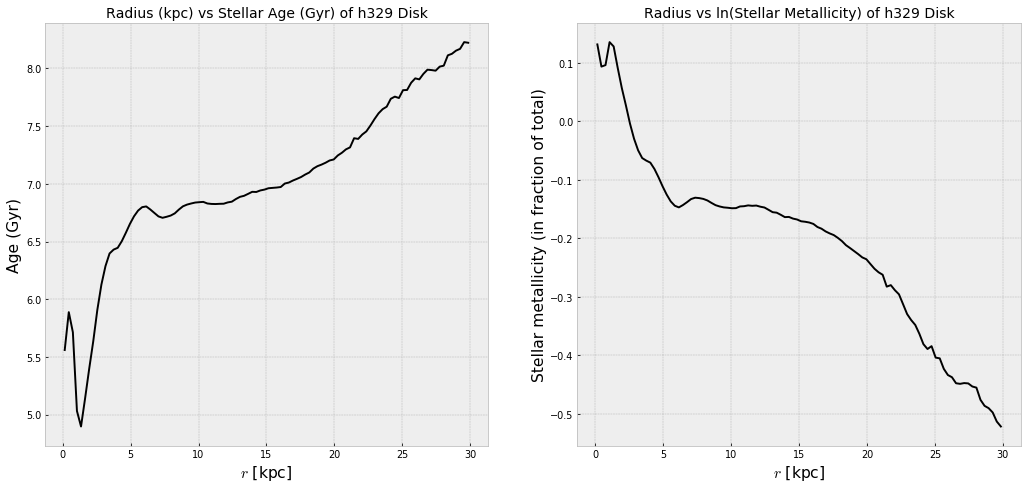

In [7]:
## Radius versus Age

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['age'].in_units('Gyr'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'Age (Gyr)', fontsize=16)
axs[0].set_title('Radius (kpc) vs Stellar Age (Gyr) of h329 Disk')

axs[1].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['feh'],'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'Stellar metallicity (in fraction of total)', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Metallicity) of h329 Disk');

## Creating Annuli

In the Notebook 10 we did an annulus around 20 kpc (19-21), now we are going to investigate around 10, 15, and 25 kpc.

In [6]:
in_r_10 = '10 kpc' 
out_r_10 = '12 kpc'

f_ann_10 = pynbody.filt.Annulus(in_r_10, out_r_10, center_d)

h329_s_ann_10 = h329_s_disk[f_ann_10]

h329_p_s_ann_10 = pynbody.analysis.profile.Profile(h329_s_ann_10, vmin =.01)


In [8]:
## Def edges of annulus
in_r_15 = '14 kpc'
out_r_15 = '16 kpc'

in_r_25 = '24 kpc'
out_r_25 = '26 kpc'

## Annulus Filter
f_ann_15 = pynbody.filt.Annulus(in_r_15, out_r_15, center_d) ## center_d defined earlier as (0,0,0)
f_ann_25 = pynbody.filt.Annulus(in_r_25, out_r_25, center_d)

## h329 sim of stars in disk around the annulus filter
h329_s_ann_15 = h329_s_disk[f_ann_15]
h329_s_ann_25 = h329_s_disk[f_ann_25]


## New radial profile with annulus
h329_p_s_ann_15 = pynbody.analysis.profile.Profile(h329_s_ann_15, vmin =.01)
h329_p_s_ann_25 = pynbody.analysis.profile.Profile(h329_s_ann_25, vmin =.01)


## Tracing Stars in Annuli Using Bridges

Using bridges to trace between snapshots: https://pynbody.github.io/pynbody/tutorials/bridge.html

In [9]:
## Pathway to the simulation galaxy data from 4032 timestep (z=0.1 ish?)

path_to_h329_4032 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032'
## We are using 4032 

h329_4032, h329_h_4032, h329_h1_4032 = sim_setup(path_to_h329_4032)

loading sim
doing units
selecting halos
making faceon


They say "f1 and f2" in bridges documentation. Mine are called "h329 and h329_4032" - equivalent to "sim" in my simsetup function

In [10]:
## Creating the bridge object

bridge = h329.bridge(h329_4032)

In [11]:
## Making progenitor particles for the different annuli

## this is where the 4096 particles are that we selected, but in the 4032 snapshot
progen_10 = bridge(h329_s_ann_10) 
progen_15 = bridge(h329_s_ann_15) 
progen_25 = bridge(h329_s_ann_25)


In [12]:
## the radial profile of the progenitor particles (has annulus still)

h329_p_s_progen_10 = pynbody.analysis.profile.Profile(progen_10.s, vmin =.01)
h329_p_s_progen_15 = pynbody.analysis.profile.Profile(progen_15.s, vmin =.01)
h329_p_s_progen_25 = pynbody.analysis.profile.Profile(progen_25.s, vmin =.01)


## R v Age for Progenitor Particles

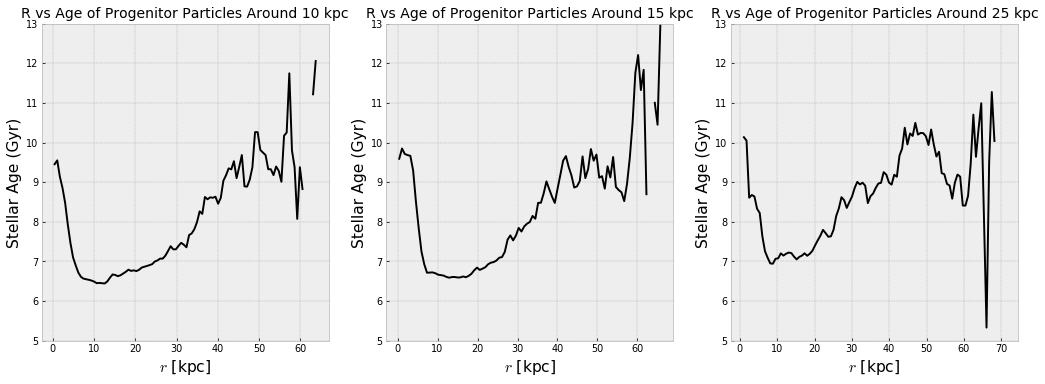

In [23]:
## r v age for progenitor particles made from annulus and stars in h329

fig, axs = plt.subplots(1, 3, figsize=[18, 6], dpi=70)

axs[0].plot(h329_p_s_progen_10['rbins'].in_units('kpc'), h329_p_s_progen_10['age'].in_units('Gyr'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'Stellar Age (Gyr)', fontsize=16)
axs[0].set_title('R vs Age of Progenitor Particles Around 10 kpc')
axs[0].set_ylim(5, 13)

axs[1].plot(h329_p_s_progen_15['rbins'].in_units('kpc'), h329_p_s_progen_15['age'].in_units('Gyr'),'k') 
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'Stellar Age (Gyr)', fontsize=16)
axs[1].set_title('R vs Age of Progenitor Particles Around 15 kpc')
axs[1].set_ylim(5, 13)

axs[2].plot(h329_p_s_progen_25['rbins'].in_units('kpc'), h329_p_s_progen_25['age'].in_units('Gyr'),'k') 
axs[2].set_xlabel('$r$ [kpc]', fontsize=16)
axs[2].set_ylabel(r'Stellar Age (Gyr)', fontsize=16)
axs[2].set_title('R vs Age of Progenitor Particles Around 25 kpc')
axs[2].set_ylim(5, 13);

## R v Mass for Progenitor Particles

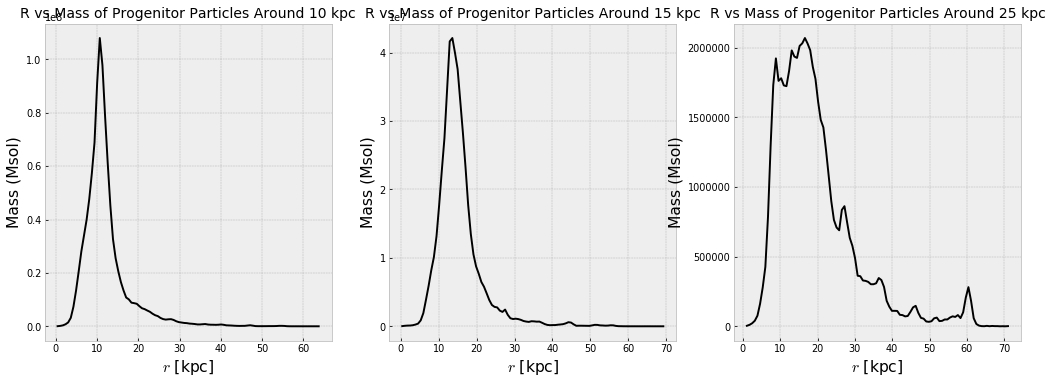

In [17]:
## r v mass for progenitor particles made from annulus and stars in h329

fig, axs = plt.subplots(1, 3, figsize=[18, 6], dpi=70)

axs[0].plot(h329_p_s_progen_10['rbins'].in_units('kpc'), h329_p_s_progen_10['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'Mass (Msol)', fontsize=16)
axs[0].set_title('R vs Mass of Progenitor Particles Around 10 kpc')
##axs[0].set_ylim(5, 13)

axs[1].plot(h329_p_s_progen_15['rbins'].in_units('kpc'), h329_p_s_progen_15['mass'].in_units('Msol'),'k') 
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'Mass (Msol)', fontsize=16)
axs[1].set_title('R vs Mass of Progenitor Particles Around 15 kpc');
##axs[1].set_ylim(5, 13);

axs[2].plot(h329_p_s_progen_25['rbins'].in_units('kpc'), h329_p_s_progen_25['mass'].in_units('Msol'),'k') 
axs[2].set_xlabel('$r$ [kpc]', fontsize=16)
axs[2].set_ylabel(r'Mass (Msol)', fontsize=16)
axs[2].set_title('R vs Mass of Progenitor Particles Around 25 kpc');

## Making Sure Simulations Have Same Shapes

In [18]:
## diff shapes need a filter so they become the same shape

print(progen_10.s, h329_s_ann_10), print(progen_15.s, h329_s_ann_15), print(progen_25.s, h329_s_ann_25)

<SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032:indexed::star" len=1663231> <SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096::star:sphere:disc:annulus" len=1663237>
<SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032:indexed::star" len=807824> <SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096::star:sphere:disc:annulus" len=807826>
<SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032:indexed::star" len=89768> <SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096::star:sphere:disc:annulus" len=89768>


(None, None, None)

Only around the 10 and 15 kpc needs to be filtered - since in the above simsnaps there are no new stars around 25 kpc (based on the "len")

In [20]:
## Set the time when new stars should be filtered out

time_1 = h329_4032.properties['time']

In [21]:
## Apply filter

h329_s_ann_10 = h329_s_ann_10[h329_s_ann_10['tform'] < time_1]
h329_s_ann_15 = h329_s_ann_15[h329_s_ann_15['tform'] < time_1]

So now the annuli around 15 kpc is fitlered and same lengths. 

## Progenitor Particles Stellar Renders

Now we will make stellar renders of the progenitor particles at each of the annuli.

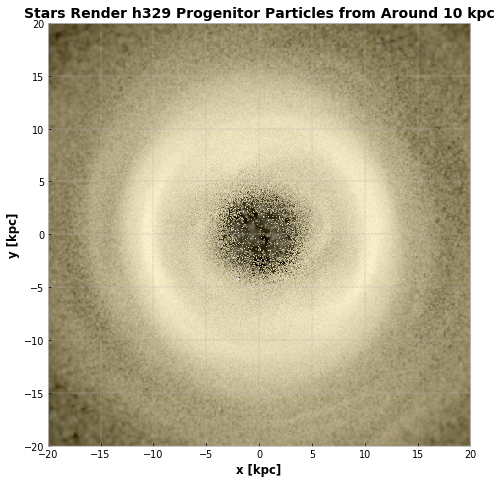

In [22]:
## Face-on image of pregenitor particles 

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(progen_10, width = '40 kpc', dynamic_range = 4)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 Progenitor Particles from Around 10 kpc', fontweight='bold');

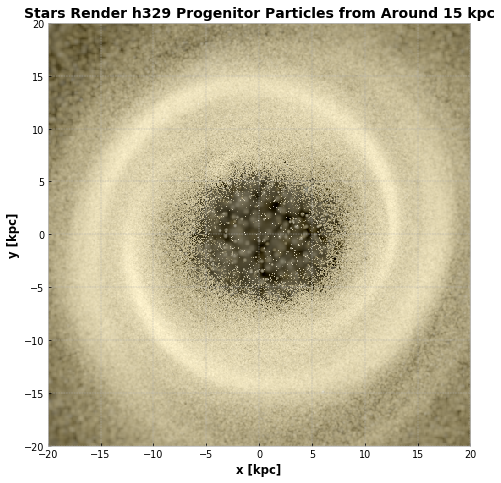

In [34]:
## Face-on image of pregenitor particles 

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(progen_15, width = '40 kpc', dynamic_range = 4)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 Progenitor Particles from Around 15 kpc', fontweight='bold');

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/plot/stars.py:72: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


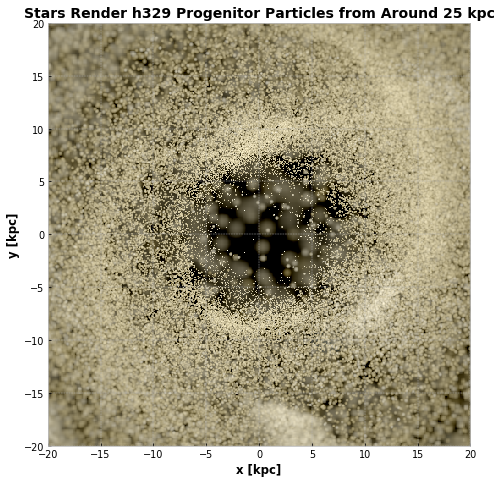

In [35]:
## Face-on image of pregenitor particles 

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(progen_25, width = '40 kpc', dynamic_range = 4)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 Progenitor Particles from Around 25 kpc', fontweight='bold');

## All Stars in the h329 4032 Timestep

Plotting all the stars in the h329 4032 timestep so we can compare to the progenitor particles in the plots above. 

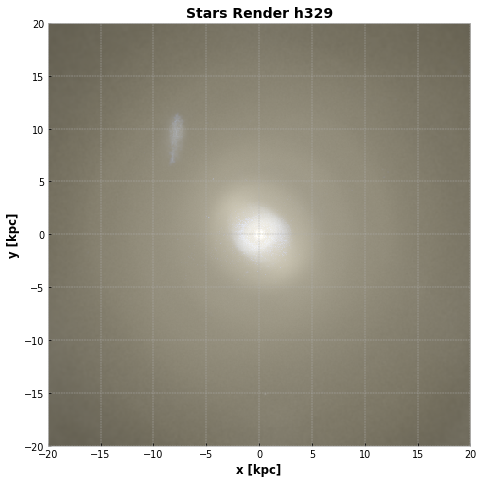

In [15]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032.s, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329', fontweight='bold');

From the image of all the stars we cannot pick out the spiral structure as well as when we see it in the progenitor particles around 15 kpc and 20 kpc (from notebook 10). We will try in the next notebook to isolate the spiral structure by plotting the stars in the h329 4032 timestep by age.

# End 